## 1)Problem Definition:
#### This project aims to build a decision Tree Model that predicts whether a person is diabetic[1] or not[0] by using medical inputs: Glucose,BMI,Insulin,Skin thickness,Blood Pressure,Pregnancies,Age and DiabetesPedigreefunction


## 2)import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier

## 3)load dataset

In [2]:
df2=pd.read_csv(r"C:\Users\navee\OneDrive\Documents\glucose.csv")
df2.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4) Data Understanding

In [3]:
# checking the columns of the dataset
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#checking the no of rows and columns
df2.shape

(768, 9)

In [5]:
#checking the data type of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#finding  the statistical opearation on whole dataset
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# detecting the null values
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# 2) detecting duplicate data
df2.duplicated().sum()

np.int64(0)

## 5)Data visualisation

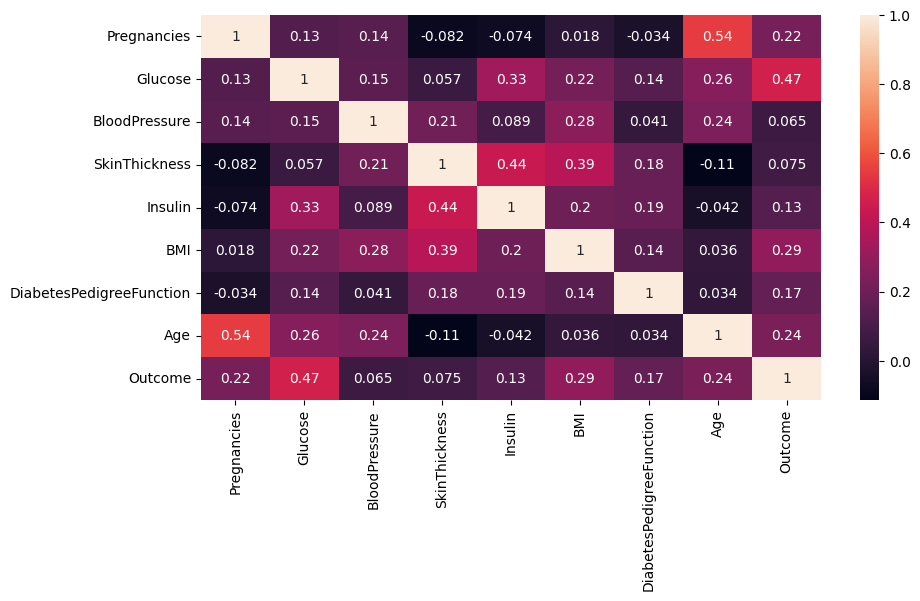

In [9]:
#1)checking the correlation through heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data=df2.corr(),annot=True)
plt.show()

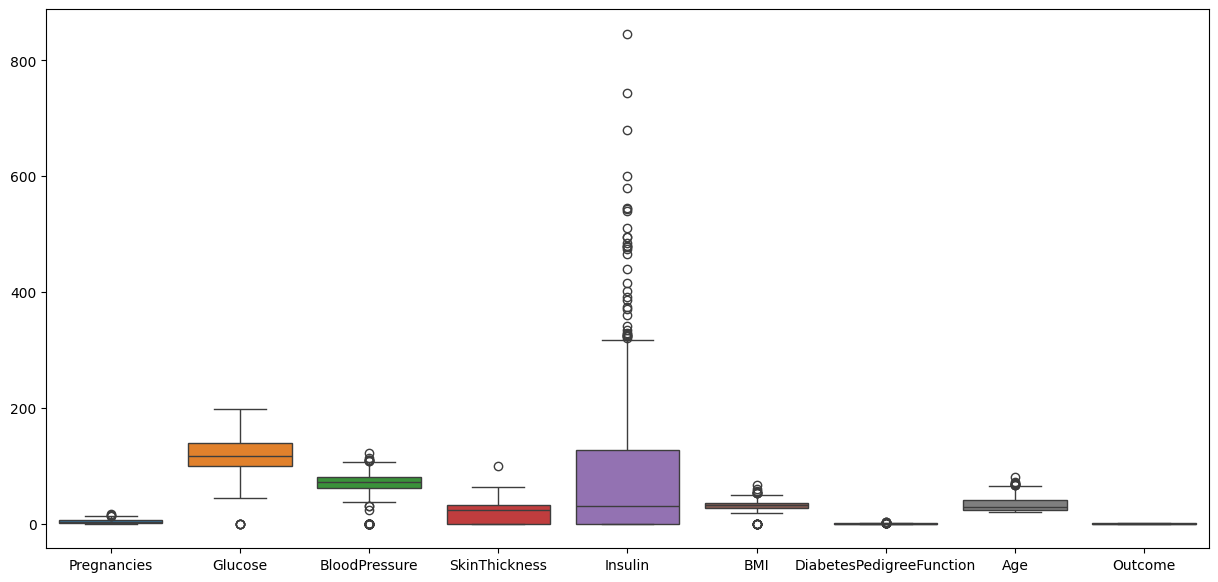

In [10]:
## detecting the outlliers through boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df2)
plt.show()

## 6) Data Preprocessing

In [11]:
# detecting outliers through IQR method
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
IQR=q3-q1
outliers=((df2 < q1-1.5*IQR)|(df2 > q3+1.5*IQR)).sum()
outliers

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [12]:
# removing outliers through IQR method
numeric_col=df2.select_dtypes(include=['float64','int64']).columns
for col in numeric_col:
    q1=df2[col].quantile(0.25)
    q3=df2[col].quantile(0.75)
    IQR=q3-q1
    df2=df2[(df2[col]>=q1-1.5*IQR) & (df2[col]<=q3+1.5*IQR)]

In [13]:
#separating the independent and dependent variable
x=df2[["Glucose","BMI","Pregnancies","Age","Insulin","DiabetesPedigreeFunction","BloodPressure","SkinThickness"]]
y=df2["Outcome"]

In [14]:
# checking shape of the column
df2.shape

(636, 9)

In [15]:
# checing the values and total number of rows in each value of target column
df2["Outcome"].value_counts()

Outcome
0    439
1    197
Name: count, dtype: int64

In [ ]:
# controlling randomness
np.random.seed(42)
random.seed(42)

In [17]:
#handling the imbalanced dataset through random over sampling technique
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y)

In [18]:
# checking total number of values in a target column
ro_y.value_counts()

Outcome
1    439
0    439
Name: count, dtype: int64

## 7) Model building

### (a) train-test-split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(ro_x,ro_y,test_size=0.3,random_state=650)

### (b) cross validation on training data

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
dt1=DecisionTreeClassifier(criterion="entropy",max_depth=3)
scores=cross_val_score(dt1,x_train,y_train,cv=skf,scoring='accuracy')
print(scores.mean())

0.742729574836732


### (c) Train final model

In [21]:
dt1.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 8) Model evaluation

In [22]:
cf=confusion_matrix(y_test,dt1.predict(x_test))
cf

array([[ 84,  50],
       [ 14, 116]])

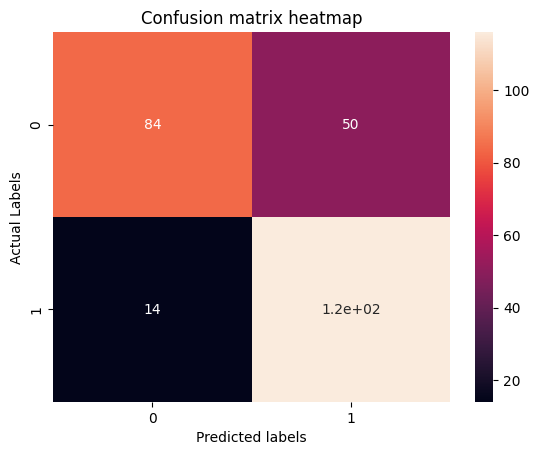

In [23]:
sns.heatmap(cf,annot=True)
plt.title("Confusion matrix heatmap")
plt.xlabel("Predicted labels")
plt.ylabel("Actual Labels")
plt.show()

In [24]:
print("precision_score:",precision_score(y_train,dt1.predict(x_train)))
print("recall_score:",recall_score(y_train,dt1.predict(x_train)))
print("f1_score:",f1_score(y_train,dt1.predict(x_train)))
print("accuracy_score:",accuracy_score(y_train,dt1.predict(x_train)))

precision_score: 0.7099236641221374
recall_score: 0.9029126213592233
f1_score: 0.7948717948717948
accuracy_score: 0.7654723127035831


In [25]:
print("precision_score:",precision_score(y_test,dt1.predict(x_test)))
print("recall_score:",recall_score(y_test,dt1.predict(x_test)))
print("f1_score:",f1_score(y_test,dt1.predict(x_test)))
print("accuracy_score:",accuracy_score(y_test,dt1.predict(x_test)))

precision_score: 0.6987951807228916
recall_score: 0.8923076923076924
f1_score: 0.7837837837837838
accuracy_score: 0.7575757575757576


## 9) Saving and loading the model

In [26]:
import joblib
joblib.dump(dt1,"diabetes_model.pkl")
joblib.load("diabetes_model.pkl")

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
